In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm

## Carregamento dos dados para topicos_cc

In [4]:
num_subjects = 10  # quantidade de pessoas
num_classes = 3    # quantidade de movimento
num_trials = 8     # quantidade de repetições
num_channels = 4   # quantidade de canais/eletrodos
num_samples = 1600 # quantidade de amostras

data = np.empty((num_subjects, num_classes, num_trials, num_channels, num_samples))

# Carregar os dados para cada pessoa
for subject_id in range(1, num_subjects + 1):
        
    # Carregar os dados dos três movimentos
    for class_id in range(1, num_classes + 1):
        
        file_path = f'./sEMG/datasets/topicos_cc/s{subject_id:02d}_{class_id}.npy'
            
        loaded_data = np.load(file_path)              # shape (8,1600,4)
        loaded_data = np.moveaxis(loaded_data, 1, -1) # shape (8,4,1600)

        data[subject_id - 1, class_id-1, :, :, :] = loaded_data
                        
print(f'{data.shape} - (voluntarios, classes, ensaios, canais, linhas)')

(10, 3, 8, 4, 1600) - (voluntarios, classes, ensaios, canais, linhas)


## Visualização dos dados

### Visualização dos dados em 2d

Visualização dos dados em 2d para o voluntário 6, classe 1, ensaio 1...2 e canais 1...4. 

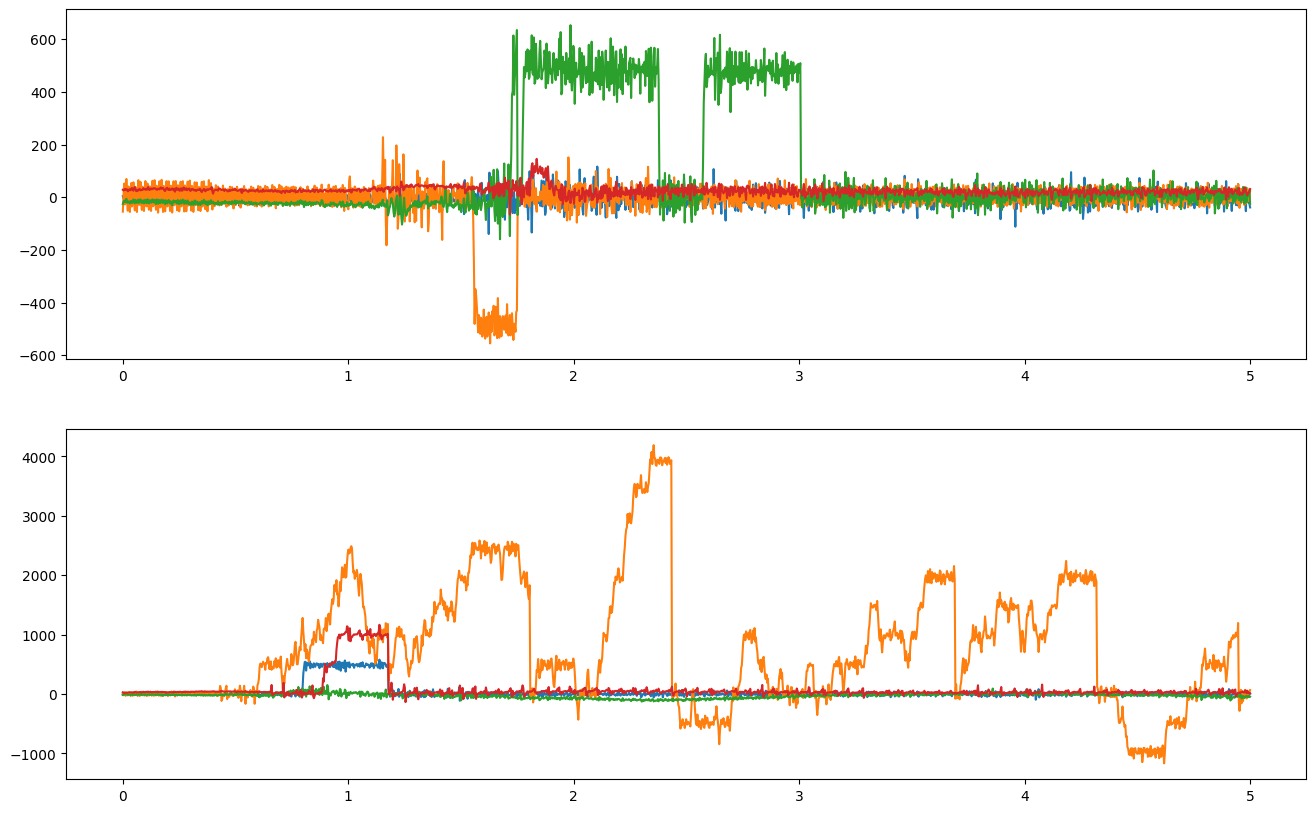

In [12]:
# [classe 1, ensaio 1, canal 1..4].
d1 = data[6,0,0,0,:], data[6,0,0,1,:], data[6,0,0,2,:], data[6,0,0,3,:]

# [classe 1, ensaio 2, canal 1..4].
d2 = data[6,0,1,0,:], data[6,0,1,1,:], data[6,0,1,2,:], data[6,0,1,3,:]

rcParams['figure.figsize'] = [16., 10.]

x = np.linspace(0, 5, num_samples)
fig, ax = plt.subplots(2, 1)

ax[0].plot(x, d1[0])
ax[0].plot(x, d1[1])
ax[0].plot(x, d1[2])
ax[0].plot(x, d1[3])

ax[1].plot(x, d2[0])
ax[1].plot(x, d2[1])
ax[1].plot(x, d2[2])
ax[1].plot(x, d2[3])

plt.show()

### Visualização dos dados em 3d

Visualização dos dados em 3d para os voluntários 1 ao 10 para o movimento 2.

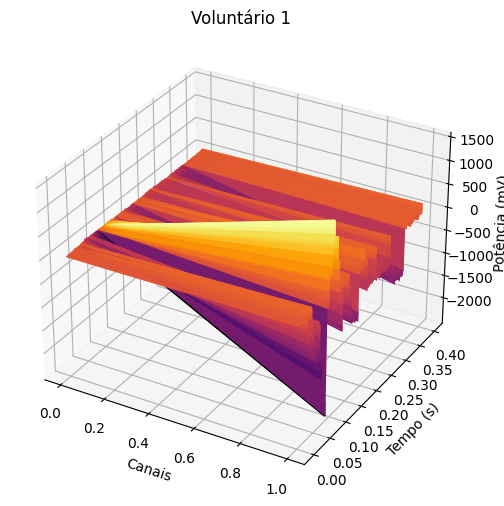

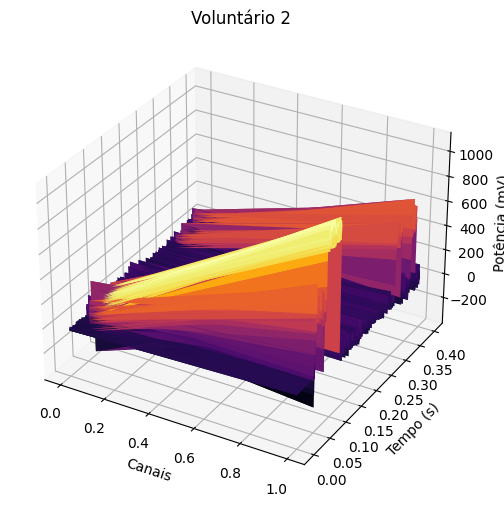

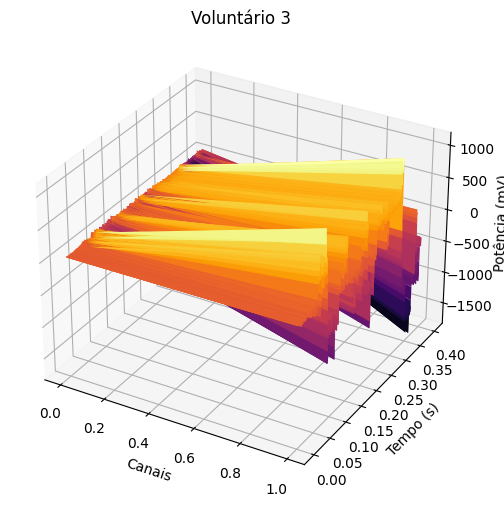

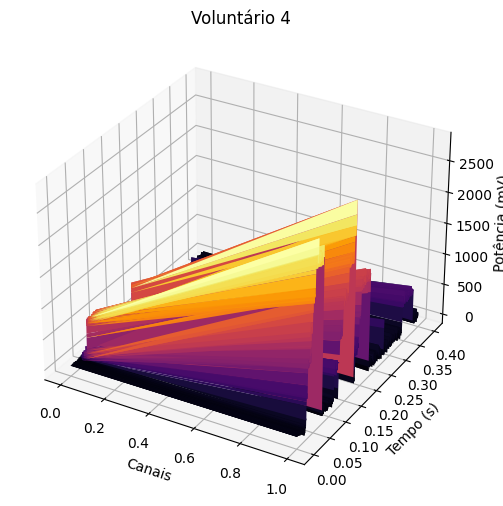

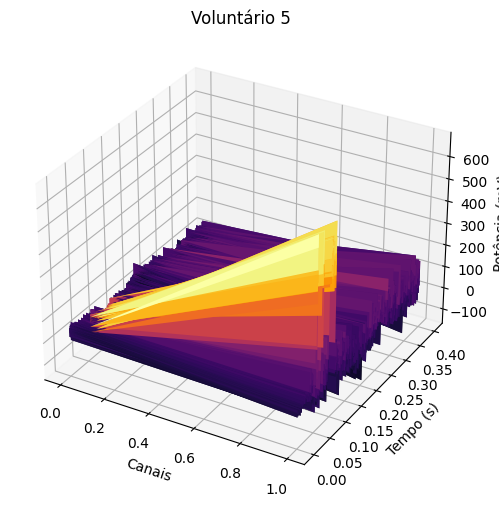

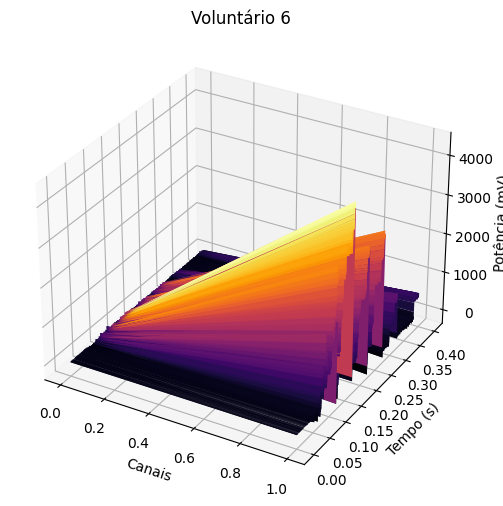

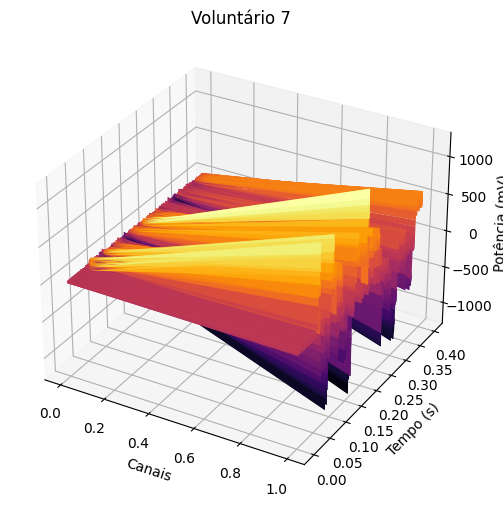

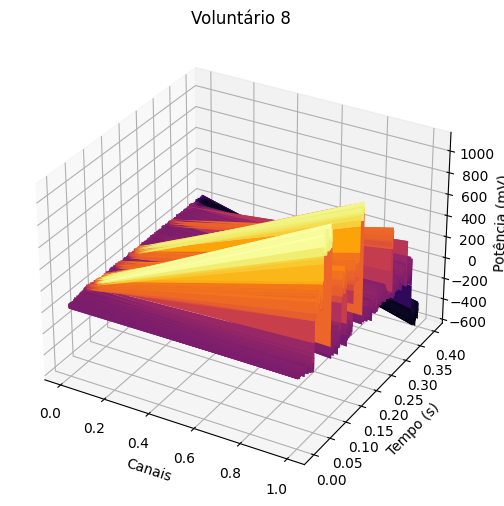

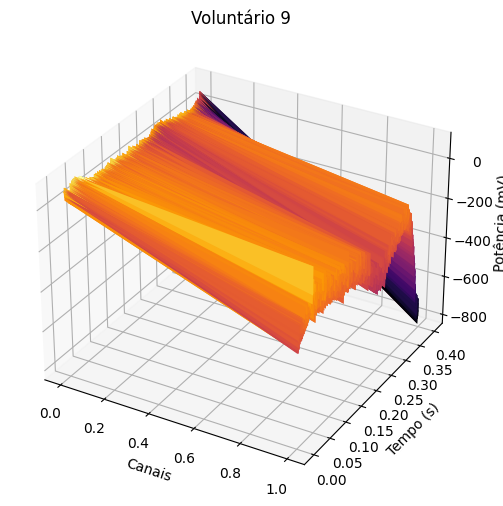

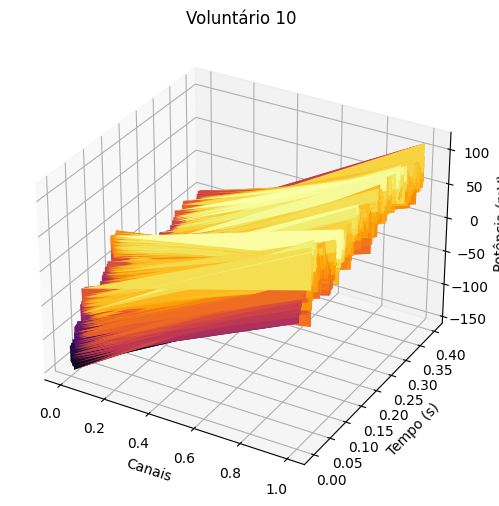

In [16]:
rcParams['figure.figsize'] = [18., 6.]

for j in range(10):
    for trial in (0, 1):
        mov = 2
        plot_data = []
        for channel in range(2):
            for i, t in enumerate(np.linspace(0, 1, 4000)):
                if i < num_samples:  
                    plot_data.append([channel, t, data[j][mov][trial][channel][i]])

    plot_data = np.array(plot_data)
    x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
    ax = plt.axes(projection ='3d')
    ax.set_title('Voluntário {}'.format(j + 1))
    ax.set_xlabel('Canais')
    ax.set_ylabel('Tempo (s)')
    ax.set_zlabel('Potência (mV)')
    ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
    plt.show()